Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [7]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

data_dir_train = pathlib.Path("./CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('./CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                seed=123,
                                                                validation_split = 0.2,
                                                                image_size=(img_height, img_width),
                                                                batch_size=batch_size,
                                                                label_mode='int',
                                                                subset = 'training')

print(train_ds)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                              seed=123,
                                                              validation_split = 0.2,
                                                              image_size=(img_height, img_width),
                                                              batch_size=batch_size,
                                                              label_mode='int',
                                                              subset = 'validation')
print(val_ds)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [12]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

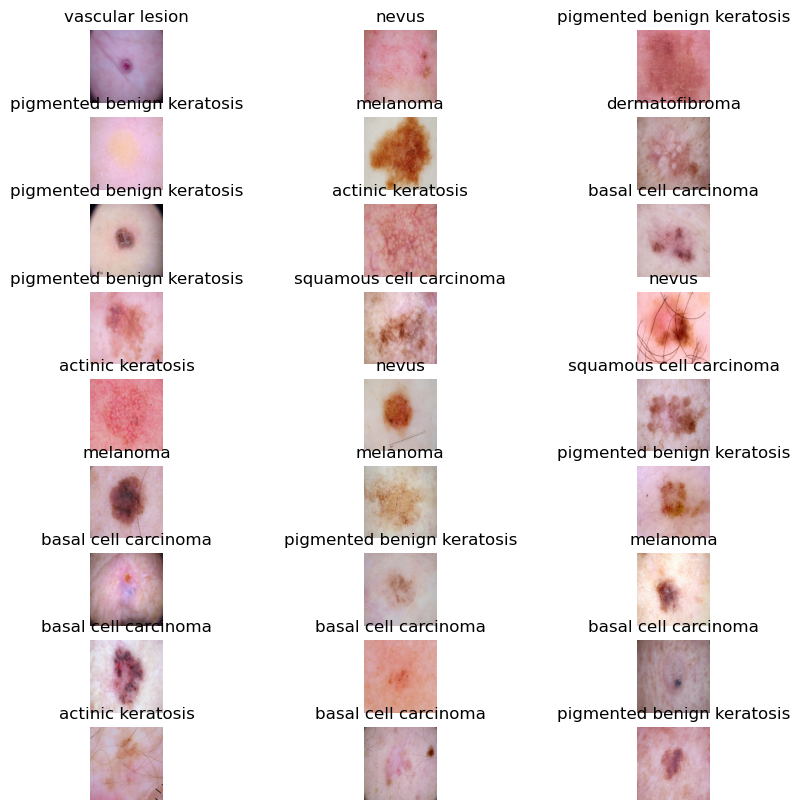

In [13]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
def plot_images(dataset, num_images=27):
  image_batch, label_batch = next(iter(dataset))
  plt.figure(figsize=(10, 10))
  for n in range(num_images):
    ax = plt.subplot(9, 3, n + 1)
    plt.imshow(image_batch[n].numpy().astype("uint8"))
    plt.title(class_names[label_batch[n]])
    plt.axis("off")

plot_images(train_ds)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [15]:
def create_cnn_model(input_shape = (180, 180, 3), num_classes = 9):
  model = models.Sequential([
      # Rescaling pixel values from [0,255] to [0,1]
      layers.Rescaling(1./255, input_shape=input_shape),
      # First convolution layer
      layers.Conv2D(32, (3,3), activation='relu', padding='same'),
      layers.MaxPooling2D((2,2)),
      # Second convolution layer
      layers.Conv2D(64, (3,3), activation='relu', padding='same'),
      layers.MaxPooling2D((2,2)),
      # Third convolution layer
      layers.Conv2D(128, (3,3), activation='relu', padding='same'),
      layers.MaxPooling2D((2,2)),
      # Flatten 3D tensor to 1D vector
      layers.Flatten(),
      # Dense Layer (Fully connected layer)
      layers.Dense(128, activation='relu'),
      # Output layer
      layers.Dense(num_classes, activation='softmax')
  ])
  return model

model = create_cnn_model()

model.summary()




c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [16]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [18]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 408ms/step - accuracy: 0.1796 - loss: 2.5338 - val_accuracy: 0.2461 - val_loss: 1.9656
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 451ms/step - accuracy: 0.3170 - loss: 1.8789 - val_accuracy: 0.3333 - val_loss: 1.7902
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 470ms/step - accuracy: 0.3545 - loss: 1.7399 - val_accuracy: 0.4966 - val_loss: 1.5150
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 487ms/step - accuracy: 0.4670 - loss: 1.5432 - val_accuracy: 0.4161 - val_loss: 1.6439
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 522ms/step - accuracy: 0.4871 - loss: 1.4359 - val_accuracy: 0.5280 - val_loss: 1.4500
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 481ms/step - accuracy: 0.5297 - loss: 1.3478 - val_accuracy: 0.4989 - val_loss: 1.5348
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 500ms/step - accuracy: 0.5798 - loss: 1.2006 - val_accuracy: 0.5280 - val_loss: 1.3956
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 518ms/step - accuracy: 0.5920 - loss: 1.1412 - val_accuracy: 0.514

### Visualizing training results

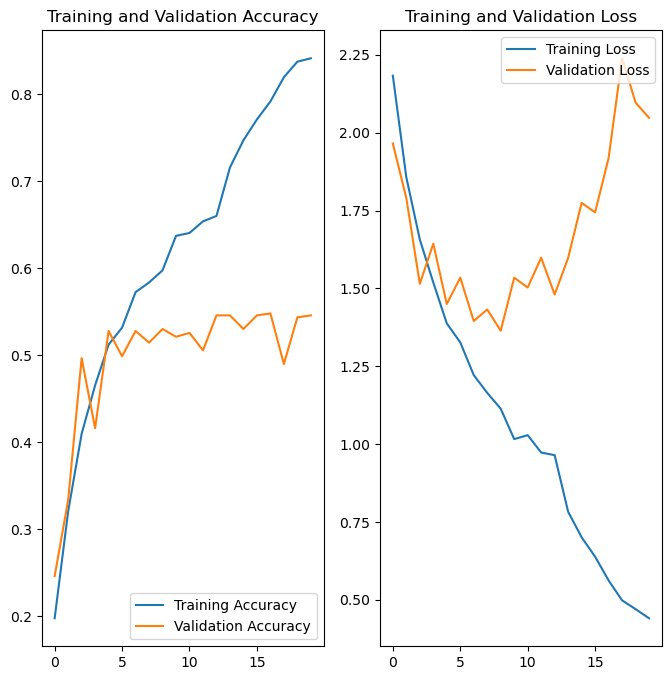

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

#### Findings,
From graph, we can clearly see there is a much gap between training accuracy and validation accuracy. Since training accuracy is higher and validation accuracy is lower its clear sign of overfitting.

In [20]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = ImageDataGenerator(rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

In [21]:
# Applying augmentation strategy to training data set
augmented_train_ds = data_augmentation.flow_from_directory(data_dir_train,
                                                            seed=123,
                                                            target_size=(img_height, img_width),
                                                            batch_size=batch_size,
                                                            class_mode='sparse',
                                                            subset = 'training',
                                                            shuffle=True)

Found 2239 images belonging to 9 classes.


In [22]:
#Fitting model with augmented train ds
history = model.fit(augmented_train_ds,
                  validation_data=val_ds,
                  epochs=10,
                  batch_size=32)

c:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 63s 896ms/step - accuracy: 0.4478 - loss: 1.8512 - val_accuracy: 0.5526 - val_loss: 1.3652
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5215 - loss: 1.3271 - val_accuracy: 0.5951 - val_loss: 1.1956
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5081 - loss: 1.3042 - val_accuracy: 0.6018 - val_loss: 1.1443
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5334 - loss: 1.3147 - val_accuracy: 0.5369 - val_loss: 1.3165
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.5479 - loss: 1.2767 - val_accuracy: 0.6130 - val_loss: 1.1167
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5610 - loss: 1.1951 - val_accuracy: 0.5772 - val_loss: 1.1650
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5639 - loss: 1.2252 - val_accuracy: 0.6242 - val_loss: 1.0642
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5597 - loss: 1.2033 - val_accuracy: 0.5503 - val_lo

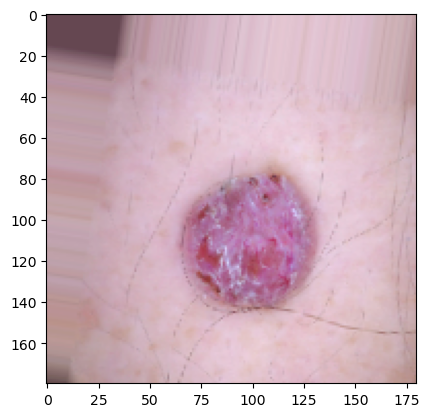

In [23]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
sample_image, _ = next(iter(augmented_train_ds))
plt.imshow(sample_image[0].astype('uint8'))
plt.show()

### Todo:
### Create the model, compile and train the model


In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

def create_cnn_model_with_dropout(input_shape=(180, 180, 3), num_classes=9, dropout_rate=0.3):
    model = models.Sequential([
        # Rescaling the pixel values from [0, 255] to [0, 1]
        layers.Rescaling(1./255, input_shape=input_shape),

        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        #layers.Dropout(dropout_rate),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        #layers.Dropout(dropout_rate),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        #layers.Dropout(dropout_rate),

        # Flatten the 3D tensor to 1D vector for the fully connected layers
        layers.Flatten(),

        # Fully connected layer (Dense layer)
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),

        # Output layer with 9 units (one for each class), softmax activation for multi-class classification
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = create_cnn_model_with_dropout()
model.summary()


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [26]:
## Your code goes here, note: train your model for 20 epochs
history_after_dropout = model.fit(augmented_train_ds,
                  validation_data=val_ds,
                  epochs=20,
                  batch_size=32)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 62s 863ms/step - accuracy: 0.1951 - loss: 2.3673 - val_accuracy: 0.2260 - val_loss: 2.0437
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.2745 - loss: 1.9258 - val_accuracy: 0.3535 - val_loss: 1.7079
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4087 - loss: 1.6620 - val_accuracy: 0.4877 - val_loss: 1.5007
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.4535 - loss: 1.5692 - val_accuracy: 0.4765 - val_loss: 1.4701
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.4511 - loss: 1.5858 - val_accuracy: 0.5280 - val_loss: 1.4666
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4780 - loss: 1.4891 - val_accuracy: 0.5302 - val_loss: 1.4214
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.4759 - loss: 1.5046 - val_accuracy: 0.5011 - val_loss: 1.4288
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5040 - loss: 1.4461 - val_accuracy: 0.5101 - val_lo

### Visualizing the results

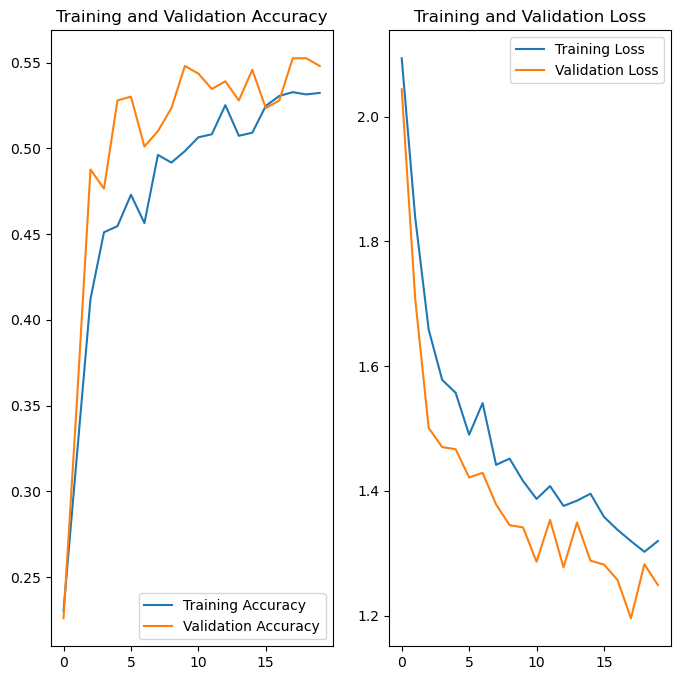

In [27]:
acc = history_after_dropout.history['accuracy']
val_acc = history_after_dropout.history['val_accuracy']

loss = history_after_dropout.history['loss']
val_loss = history_after_dropout.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### yes, we can see overfitting is reduced. but model is underperforming. There is a scope for imporoving performance.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

Class Counts:
Class actinic keratosis: 92 samples
Class basal cell carcinoma: 309 samples
Class dermatofibroma: 77 samples
Class melanoma: 352 samples
Class nevus: 277 samples
Class pigmented benign keratosis: 370 samples
Class seborrheic keratosis: 58 samples
Class squamous cell carcinoma: 142 samples
Class vascular lesion: 115 samples


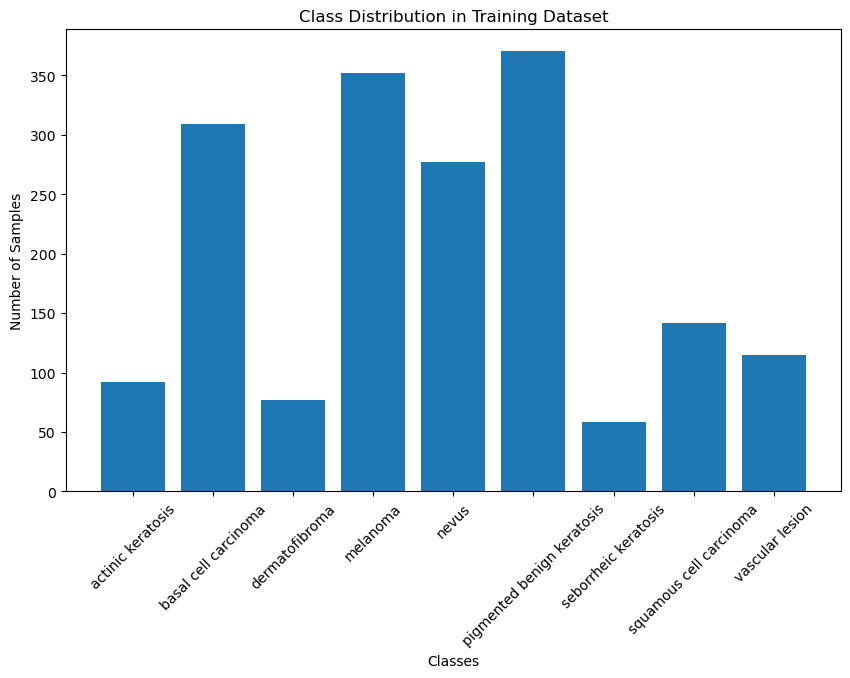

In [32]:
class_labels = []
for images, labels in train_ds:
    class_labels.extend(labels.numpy())  # Convert labels to numpy array and collect them

# Convert the list of labels to a numpy array
class_labels = np.array(class_labels)

# Count occurrences of each class using np.unique
class_counts = np.unique(class_labels, return_counts=True)

# Display class counts
print("Class Counts:")
for class_id, count in zip(class_counts[0], class_counts[1]):
    print(f"Class {class_names[class_id]}: {count} samples")

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts[0], class_counts[1], tick_label=[class_names[i] for i in class_counts[0]])
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
##### Ans: seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
##### Ans: pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [33]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [48]:
#path_to_training_dataset="./CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
path_to_training_dataset = r"C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"+"/"
print(os.path.exists(path_to_training_dataset))
import Augmentor
for i in class_names:
    print(path_to_training_dataset+"")
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

True
C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/
Initialised with 114 image(s) found.
Output directory set to C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2303DCF04A0>: 100%|██████████| 500/500 [00:02<00:00, 221.39 Samples/s]


C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/
Initialised with 376 image(s) found.
Output directory set to C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x230416CF740>: 100%|██████████| 500/500 [00:02<00:00, 210.91 Samples/s]


C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/
Initialised with 95 image(s) found.
Output directory set to C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2303DCF0A40>: 100%|██████████| 500/500 [00:02<00:00, 204.91 Samples/s]                  


C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/
Initialised with 438 image(s) found.
Output directory set to C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x230416EF1A0>: 100%|██████████| 500/500 [00:13<00:00, 36.53 Samples/s] 


C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/
Initialised with 357 image(s) found.
Output directory set to C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x230416A6EA0>: 100%|██████████| 500/500 [00:20<00:00, 24.34 Samples/s]                   


C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/
Initialised with 462 image(s) found.
Output directory set to C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22FD9B0DE80>: 100%|██████████| 500/500 [00:04<00:00, 106.73 Samples/s]                  


C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/
Initialised with 77 image(s) found.
Output directory set to C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x23040C38260>: 100%|██████████| 500/500 [00:11<00:00, 42.25 Samples/s]                  


C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/
Initialised with 181 image(s) found.
Output directory set to C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x230416CDFA0>: 100%|██████████| 500/500 [00:05<00:00, 92.01 Samples/s]                   


C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/
Initialised with 139 image(s) found.
Output directory set to C:\Users\user\upgrad-ai-ml\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x23040C45E50>: 100%|██████████| 500/500 [00:05<00:00, 86.08 Samples/s] 


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [49]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [52]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_07837cca-4124-4c98-a514-2e72a53ffb79.jpg',
 'CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1a7c930f-35e9-4b70-840a-84ac13a9d02c.jpg',
 'CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6e18609f-a606-420e-ade8-2e83b578cf61.jpg',
 'CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9f750dcd-3524-481f-be5d-44865fe893c1.jpg',
 'CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a39644ea-ef48-42b2-85d9-561cc49d2

In [54]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [68]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [69]:
original_df = pd.DataFrame()
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [70]:
new_df['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [71]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [72]:
#data_dir_train="path to directory with training data + data created using augmentor"
data_dir_train=path_to_training_dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [73]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [79]:
def create_cnn_model_with_normalize(input_shape=(180, 180, 3), num_classes=9, dropout_rate=0.3):
    model = models.Sequential([
        # Rescaling the pixel values from [0, 255] to [0, 1]
        layers.Rescaling(1./255, input_shape=input_shape),

        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Flatten the 3D tensor to 1D vector for the fully connected layers
        layers.Flatten(),

        # Fully connected layer (Dense layer)
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),

        # Output layer with 9 units (one for each class), softmax activation for multi-class classification
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = create_cnn_model_with_normalize()
model.summary()

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,024,905 (30.61 MB)

 Trainable params: 8,024,649 (30.61 MB)

 Non-trainable params: 256 (1.00 KB)

In [74]:
# model = models.Sequential([
#     # First Convolutional Layer with Batch Normalization
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
    
#     # Second Convolutional Layer with Batch Normalization
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
    
#     # Third Convolutional Layer with Batch Normalization
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
    
#     # Flatten the output to feed into a dense layer
#     layers.Flatten(),
    
#     # Fully Connected Layer
#     layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
    
#     # Output Layer (for classification)
#     layers.Dense(9, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Model summary
# model.summary()

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,649,545 (25.37 MB)

 Trainable params: 6,648,841 (25.36 MB)

 Non-trainable params: 704 (2.75 KB)

#### **Todo:**  Compile your model

In [80]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [81]:
epochs = 30
## Your code goes here, use 50 epochs.
history_after_new_images_added = model.fit(train_ds,
                  validation_data=val_ds,
                  epochs=20,
                  batch_size=32)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 103s 597ms/step - accuracy: 0.2961 - loss: 1.9145 - val_accuracy: 0.1618 - val_loss: 4.2879
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 116s 685ms/step - accuracy: 0.4368 - loss: 1.5316 - val_accuracy: 0.2346 - val_loss: 2.9220
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 125s 741ms/step - accuracy: 0.5127 - loss: 1.3826 - val_accuracy: 0.3415 - val_loss: 2.2031
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 115s 681ms/step - accuracy: 0.5327 - loss: 1.3236 - val_accuracy: 0.3883 - val_loss: 1.8097
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 118s 694ms/step - accuracy: 0.5772 - loss: 1.1872 - val_accuracy: 0.3667 - val_loss: 1.9618
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 120s 709ms/step - accuracy: 0.6141 - loss: 1.1202 - val_accuracy: 0.4707 - val_loss: 1.3333
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 119s 699ms/step - accuracy: 0.6477 - loss: 1.0141 - val_accuracy: 0.3712 - val_loss: 2.2000
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 123s 728ms/step - accuracy: 0.6825 -

#### **Todo:**  Visualize the model results

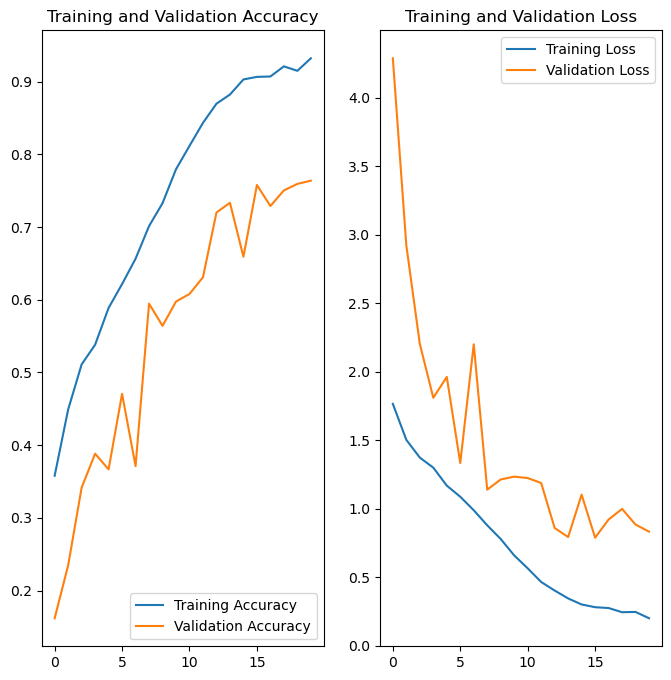

In [82]:
acc = history_after_new_images_added.history['accuracy']
val_acc = history_after_new_images_added.history['val_accuracy']

loss = history_after_new_images_added.history['loss']
val_loss = history_after_new_images_added.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Validation loss is reduced, and Traning and Validation accuracy is improved. 